<a href="https://colab.research.google.com/github/cricci3/Salaries_clustering/blob/analytics/Project2_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import warnings
warnings.filterwarnings("ignore")

In [134]:
'''
Data Analytics
Assignment 2 - Group 2
Salaries (clustering)

Students: Pernille Bergesen (pernille.bergesen@usi.ch) and Claudio Ricci (riccicl@usi.ch)
'''

'\nData Analytics\nAssignment 2 - Group 2\nSalaries (clustering)\n\nStudents: Pernille Bergesen (pernille.bergesen@usi.ch) and Claudio Ricci (riccicl@usi.ch)\n'

In [135]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Datasets

In [137]:
#loading the data from the san-francisco datasets
dataset_file_2011 = '/content/drive/MyDrive/DataAnalytics_02_Salaries/san-francisco-2011.csv'
dataset_file_2012 = '/content/drive/MyDrive/DataAnalytics_02_Salaries/san-francisco-2012.csv'
dataset_file_2013 = '/content/drive/MyDrive/DataAnalytics_02_Salaries/san-francisco-2013.csv'
dataset_file_2014 = '/content/drive/MyDrive/DataAnalytics_02_Salaries/san-francisco-2014.csv'

#just for testing:
#printing first two lines of 2011 dataset

df_2011 = pd.read_csv(dataset_file_2011)
df_2012 = pd.read_csv(dataset_file_2012)
df_2013 = pd.read_csv(dataset_file_2013)
df_2014 = pd.read_csv(dataset_file_2014)


print("san-francisco-2011.csv: ")
df_2011.head(2)

san-francisco-2011.csv: 


,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,Not Provided,567595.43,567595.43,2011,NaN,San Francisco
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011,NaN,San Francisco


In [138]:
#printing first two lines of 2012 dataset
print("san-francisco-2012.csv: ")
df_2012.head(2)

san-francisco-2012.csv: 


,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency
0,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,NaN,San Francisco
1,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,NaN,San Francisco


In [139]:
#printing first two lines of 2013 dataset
print("san-francisco-2013.csv: ")
df_2013.head(2)

san-francisco-2013.csv: 


,employee_name,job_title,base_pay,overtime_pay,other_pay,total_benefits,total_pay,total_pay_benefits,year,notes,jurisdiction_name
0,Gregory P Suhr,Chief of Police,319275.01,0.0,20007.06,86533.21,339282.07,425815.28,2013,NaN,San Francisco
1,Joanne M Hayes-White,"Chief, Fire Department",313686.01,0.0,23236.00,85431.39,336922.01,422353.40,2013,NaN,San Francisco


In [140]:
#printing first two lines of 2014 dataset
print("san-francisco-2014.csv: ")
df_2014.head(2)

san-francisco-2014.csv: 


,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
0,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,NaN,San Francisco,PT
1,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,NaN,San Francisco,FT


In [141]:
df_2011.columns

Index(['Employee Name', 'Job Title', 'Base Pay', 'Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Total Pay & Benefits', 'Year', 'Notes',
       'Agency'],
      dtype='object')

In [142]:
df_2012.columns

Index(['Employee Name', 'Job Title', 'Base Pay', 'Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Total Pay & Benefits', 'Year', 'Notes',
       'Agency'],
      dtype='object')

In [143]:
df_2013.columns

Index(['employee_name', 'job_title', 'base_pay', 'overtime_pay', 'other_pay',
       'total_benefits', 'total_pay', 'total_pay_benefits', 'year', 'notes',
       'jurisdiction_name'],
      dtype='object')

In [144]:
df_2014.columns

Index(['Employee Name', 'Job Title', 'Base Pay', 'Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Total Pay & Benefits', 'Year', 'Notes',
       'Agency', 'Status'],
      dtype='object')

In [145]:
print(df_2011['Agency'].unique())
print(df_2012['Agency'].unique())
print(df_2013['jurisdiction_name'].unique())
print(df_2014['Agency'].unique())

['San Francisco']
['San Francisco']
['San Francisco']
['San Francisco']


df2011/12/14 have column Agency while df2013 has column jurisdiction_name but both have just a class inside, 'San Francisco' -> I will rename 'jurisdiction_name' in 'Agency'

In [146]:
# Rename juristiction_name into Agency
df_2013.rename(columns={'jurisdiction_name': 'Agency'}, inplace=True)

In [147]:
# others rename
df_2013.rename(columns={'employee_name' : 'Employee Name',
                        'job_title' : 'Job Title',
                        'base_pay' : 'Base Pay',
                        'overtime_pay' : 'Overtime Pay',
                        'other_pay' : 'Other Pay',
                        'total_benefits' : 'Benefits',
                        'total_pay' : 'Total Pay',
                        'total_pay_benefits' : 'Total Pay & Benefits',
                        'year' : 'Year',
                        'notes' : 'Notes'}, inplace=True)

In [148]:
df_2013.columns

Index(['Employee Name', 'Job Title', 'Base Pay', 'Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Total Pay & Benefits', 'Year', 'Notes',
       'Agency'],
      dtype='object')

In [149]:
# Df_2014 has also status : Part-time / Full-time / nan -> I will delete it so we can merge the four datasets
df_2014['Status'].unique()

array(['PT', 'FT', nan], dtype=object)

In [150]:
df_2014.drop(columns=['Status'], inplace=True)

In [151]:
df_2014.columns

Index(['Employee Name', 'Job Title', 'Base Pay', 'Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Total Pay & Benefits', 'Year', 'Notes',
       'Agency'],
      dtype='object')

# Merge Datasets

In [152]:
df = pd.concat([df_2011, df_2012, df_2013, df_2014])

In [153]:
df.head(5)

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011,NaN,San Francisco
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011,NaN,San Francisco
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011,NaN,San Francisco
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011,NaN,San Francisco
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011,NaN,San Francisco


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148654 entries, 0 to 38122
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Employee Name         148654 non-null  object 
 1   Job Title             148654 non-null  object 
 2   Base Pay              148049 non-null  object 
 3   Overtime Pay          148654 non-null  object 
 4   Other Pay             148654 non-null  object 
 5   Benefits              148654 non-null  object 
 6   Total Pay             148654 non-null  float64
 7   Total Pay & Benefits  148654 non-null  float64
 8   Year                  148654 non-null  int64  
 9   Notes                 0 non-null       float64
 10  Agency                148654 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 13.6+ MB


In [155]:
df.drop(columns=['Agency'], inplace=True) # No information, just one classes

# Manipulate NaNs

In [156]:
print(f"Number of NaN values before manipulations: {df.isnull().sum()}")

Number of NaN values before manipulations: Employee Name                0
Job Title                    0
Base Pay                   605
Overtime Pay                 0
Other Pay                    0
Benefits                     0
Total Pay                    0
Total Pay & Benefits         0
Year                         0
Notes                   148654
dtype: int64


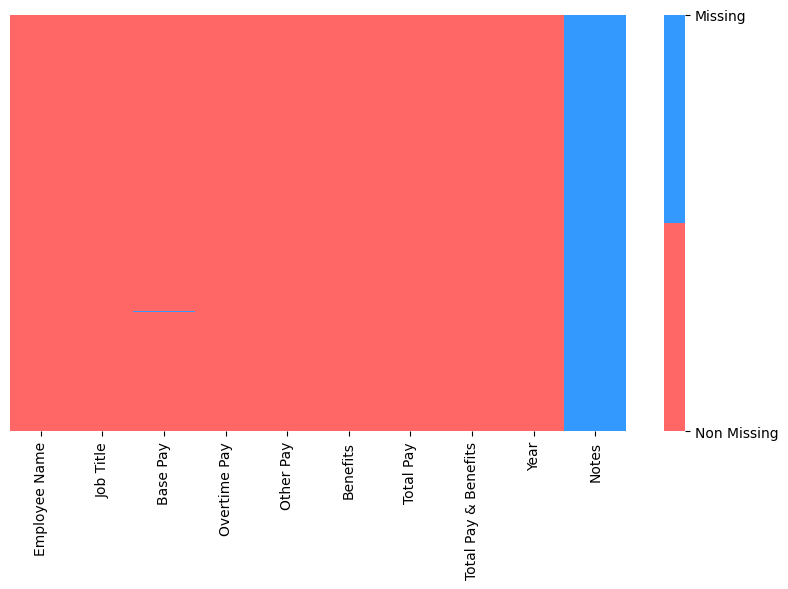

In [157]:
cmap = sns.color_palette(["#FF6666", "#3399FF"])

plt.figure(figsize=(8,6))

# Create heatmap
heatmap = sns.heatmap(df.isna(),
                      cbar=True,
                      cmap=cmap,
                      yticklabels=False)

plt.xticks(rotation=90)
plt.tight_layout()

colorbar = heatmap.collections[0].colorbar
colorbar.set_ticks([0, 1])
colorbar.set_ticklabels(['Non Missing', 'Missing'])

plt.show()

In [158]:
# Notes columns is full of null values -> drop
df.drop(columns=['Notes'], inplace=True)

In [159]:
# I will also remove Name (useless)
df.drop(columns=['Employee Name'], inplace=True)

In [160]:
# Convert different Pays to numeric, coercing non-numeric values to NaN
df['Overtime Pay'] = pd.to_numeric(df['Overtime Pay'], errors='coerce')
df['Other Pay'] = pd.to_numeric(df['Other Pay'], errors='coerce')
df['Benefits'] = pd.to_numeric(df['Benefits'], errors='coerce')
df['Base Pay'] = pd.to_numeric(df['Base Pay'], errors='coerce')

In [161]:
# Check how many NaNs we have now
print(f"Number of NaN values after change in numeric: {df.isnull().sum()}")

# Now fill NaN values with median
df['Base Pay'].fillna(df['Base Pay'].median(), inplace=True)
df['Overtime Pay'].fillna(df['Overtime Pay'].median(), inplace=True)
df['Other Pay'].fillna(df['Other Pay'].median(), inplace=True)
df['Benefits'].fillna(df['Benefits'].median(), inplace=True)

# Verify all NaNs are gone
print(f"Number of NaN values after manipulations: {df.isnull().sum()}")

Number of NaN values after change in numeric: Job Title                   0
Base Pay                  609
Overtime Pay                4
Other Pay                   4
Benefits                36163
Total Pay                   0
Total Pay & Benefits        0
Year                        0
dtype: int64
Number of NaN values after manipulations: Job Title               0
Base Pay                0
Overtime Pay            0
Other Pay               0
Benefits                0
Total Pay               0
Total Pay & Benefits    0
Year                    0
dtype: int64


# Data Analysis

In [162]:
print(f"Shape of the dataset: {df.shape}")
print("\nFirst few rows:")
print(df.head())

Shape of the dataset: (148654, 8)

First few rows:
                                        Job Title   Base Pay  Overtime Pay  \
0  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18          0.00   
1                 CAPTAIN III (POLICE DEPARTMENT)  155966.02     245131.88   
2                 CAPTAIN III (POLICE DEPARTMENT)  212739.13     106088.18   
3            WIRE ROPE CABLE MAINTENANCE MECHANIC   77916.00      56120.71   
4    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134401.60       9737.00   

   Other Pay  Benefits  Total Pay  Total Pay & Benefits  Year  
0  400184.25  28628.62  567595.43             567595.43  2011  
1  137811.38  28628.62  538909.28             538909.28  2011  
2   16452.60  28628.62  335279.91             335279.91  2011  
3  198306.90  28628.62  332343.61             332343.61  2011  
4  182234.59  28628.62  326373.19             326373.19  2011  


In [163]:
print("\nData types:")
print(df.dtypes)


Data types:
Job Title                object
Base Pay                float64
Overtime Pay            float64
Other Pay               float64
Benefits                float64
Total Pay               float64
Total Pay & Benefits    float64
Year                      int64
dtype: object


In [164]:
# Select only the numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numeric columns: {numeric_columns}")

Numeric columns: ['Base Pay', 'Overtime Pay', 'Other Pay', 'Benefits', 'Total Pay', 'Total Pay & Benefits', 'Year']


In [165]:
print("\nDescriptive statistics:")
print(df[numeric_columns].describe().T)


Descriptive statistics:
                         count          mean           std      min  \
Base Pay              148654.0  66320.049313  42677.029781  -166.01   
Overtime Pay          148654.0   5065.923568  11454.256594    -0.01   
Other Pay             148654.0   3648.690945   8056.506915 -7058.59   
Benefits              148654.0  25888.705945  13488.172930   -33.89   
Total Pay             148654.0  74768.321972  50517.005274  -618.13   
Total Pay & Benefits  148654.0  93692.554811  62793.533483  -618.13   
Year                  148654.0   2012.522643      1.117538  2011.00   

                             25%       50%          75%        max  
Base Pay              33847.0175  65007.45   94605.7400  319275.01  
Overtime Pay              0.0000      0.00    4657.6325  245131.88  
Other Pay                 0.0000    811.27    4235.9075  400184.25  
Benefits              22342.2975  28628.62   33468.9800   96570.66  
Total Pay             36168.9950  71426.61  105839.1350  5675

In [166]:
# Function to plot histograms with density curve and vertical lines for mean, median and outlier bounds
def plot_distribution(column, df, bins=30):
    plt.figure(figsize=(12, 6))

    # Identify potential outliers using IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Plot histogram and density for all data (including outliers)
    sns.histplot(df[column], kde=True, bins=bins)

    # Add median lines
    plt.axvline(df[column].median(), color='g', linestyle='-.', label=f'Median: {df[column].median():.2f}')

    # Add outlier threshold lines
    plt.axvline(lower_bound, color='orange', linestyle=':', label=f'Lower outlier threshold: {lower_bound:.2f}')
    plt.axvline(upper_bound, color='orange', linestyle=':', label=f'Upper outlier threshold: {upper_bound:.2f}')

    # Add title and labels
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(loc='upper right', fontsize=10)

    plt.show()

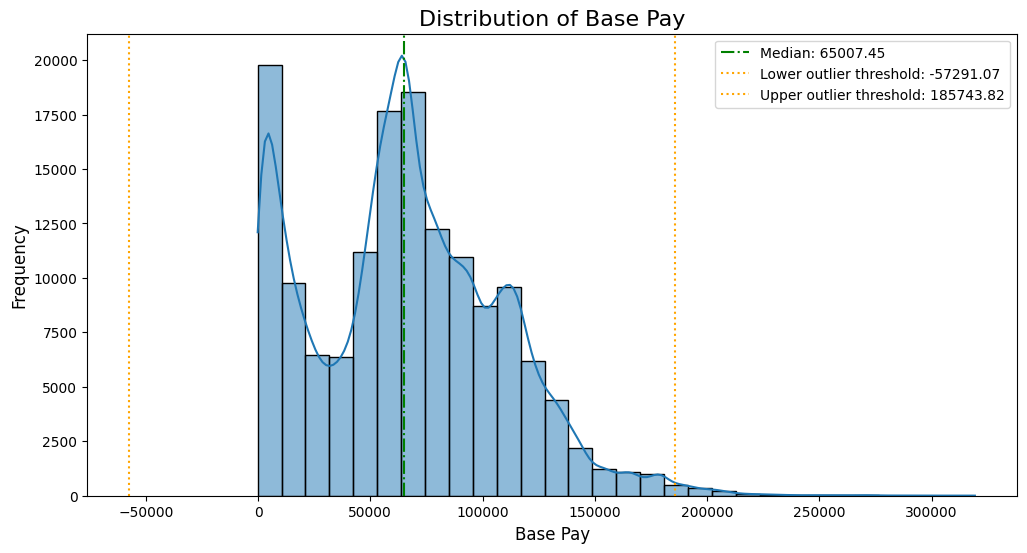

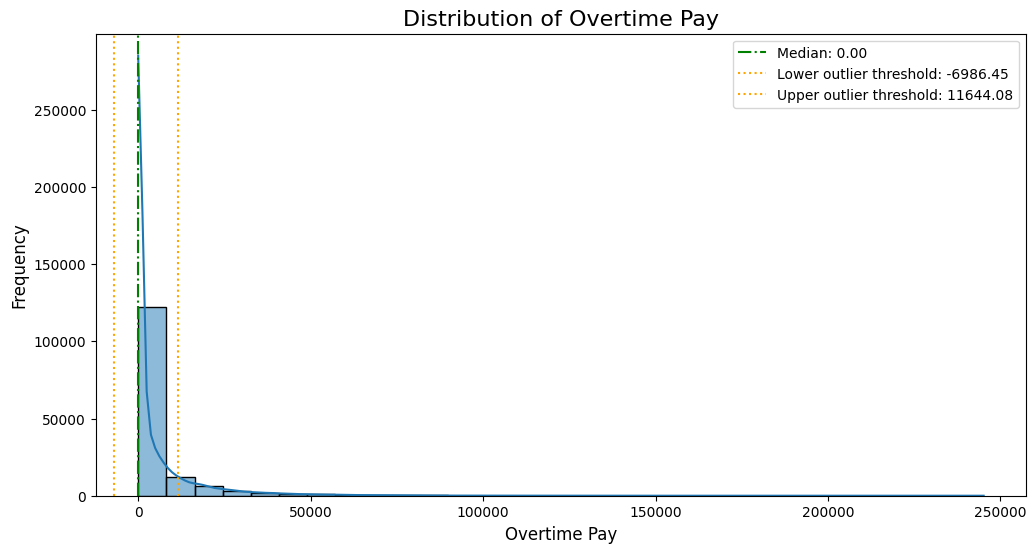

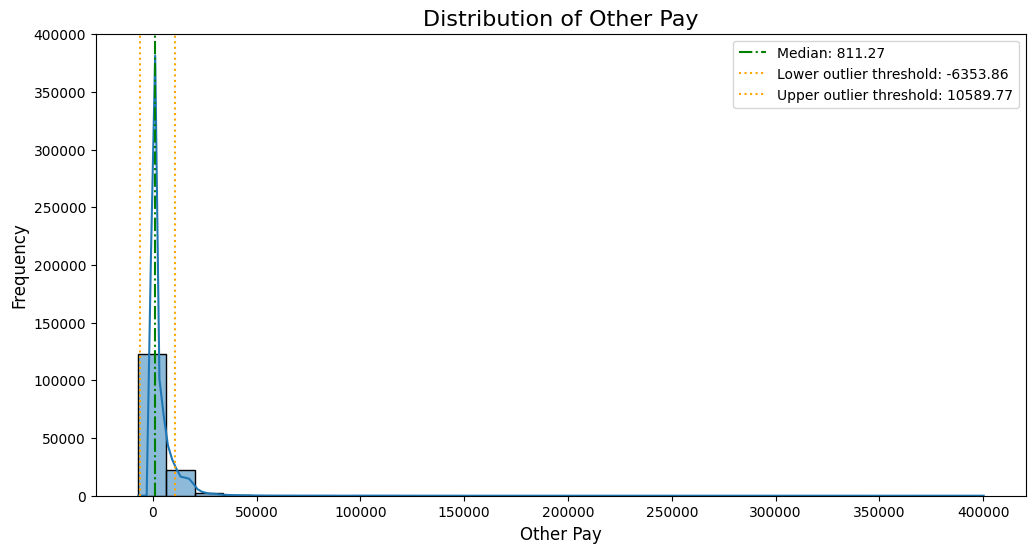

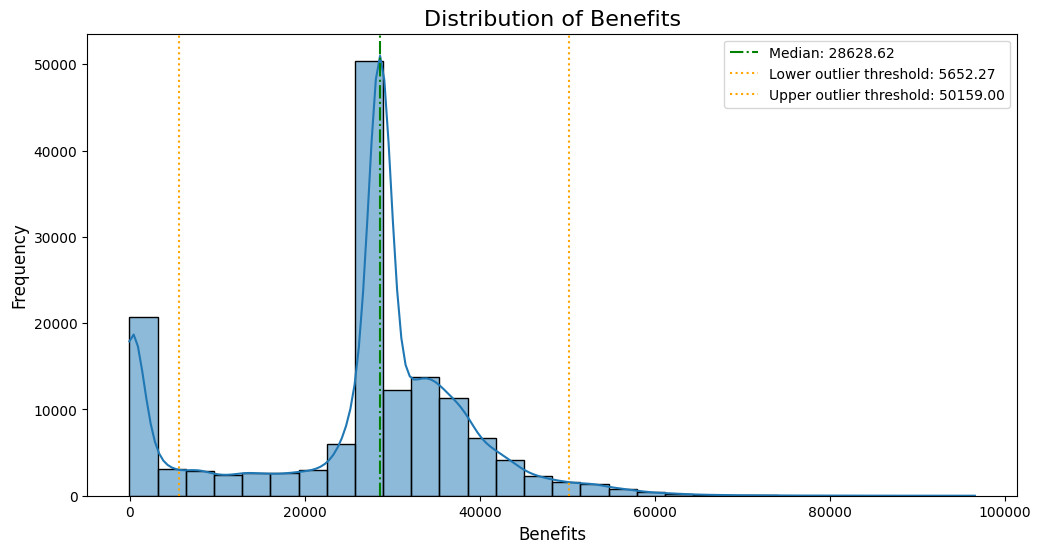

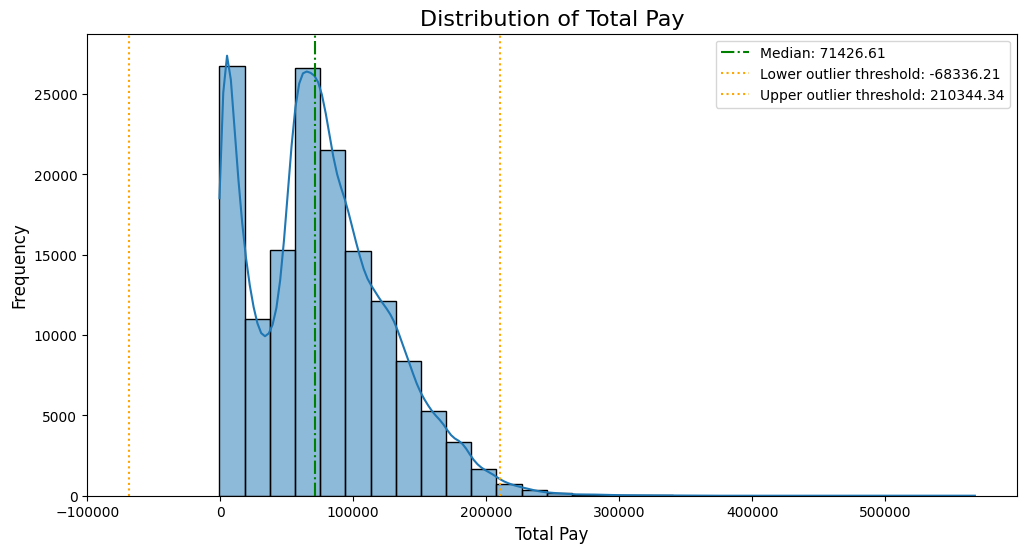

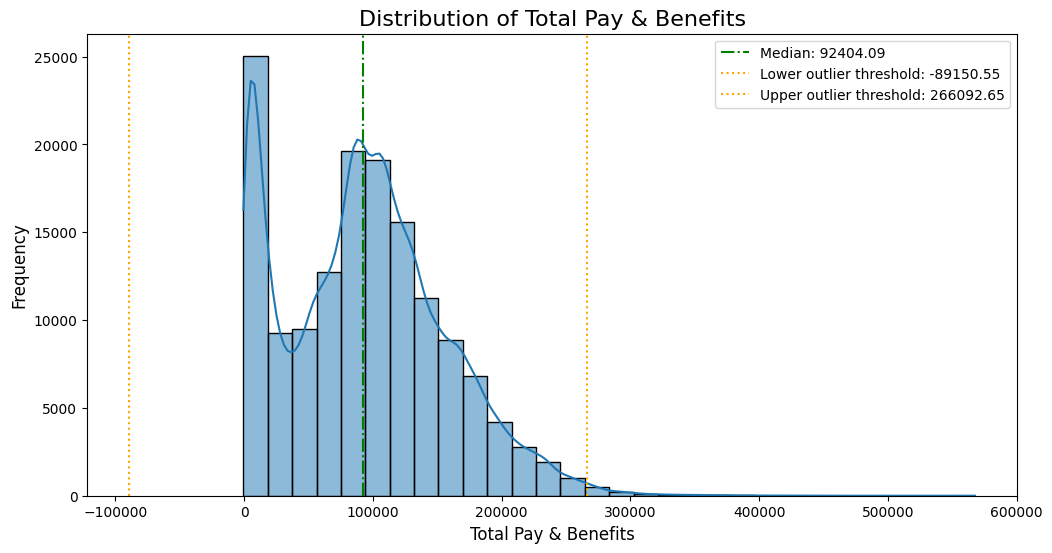

In [167]:
# Plot distributions for each numeric column (limit to relevant ones)
pay_columns = [col for col in numeric_columns if 'Pay' in col or 'Benefits' in col]
for column in pay_columns:
    plot_distribution(column, df)

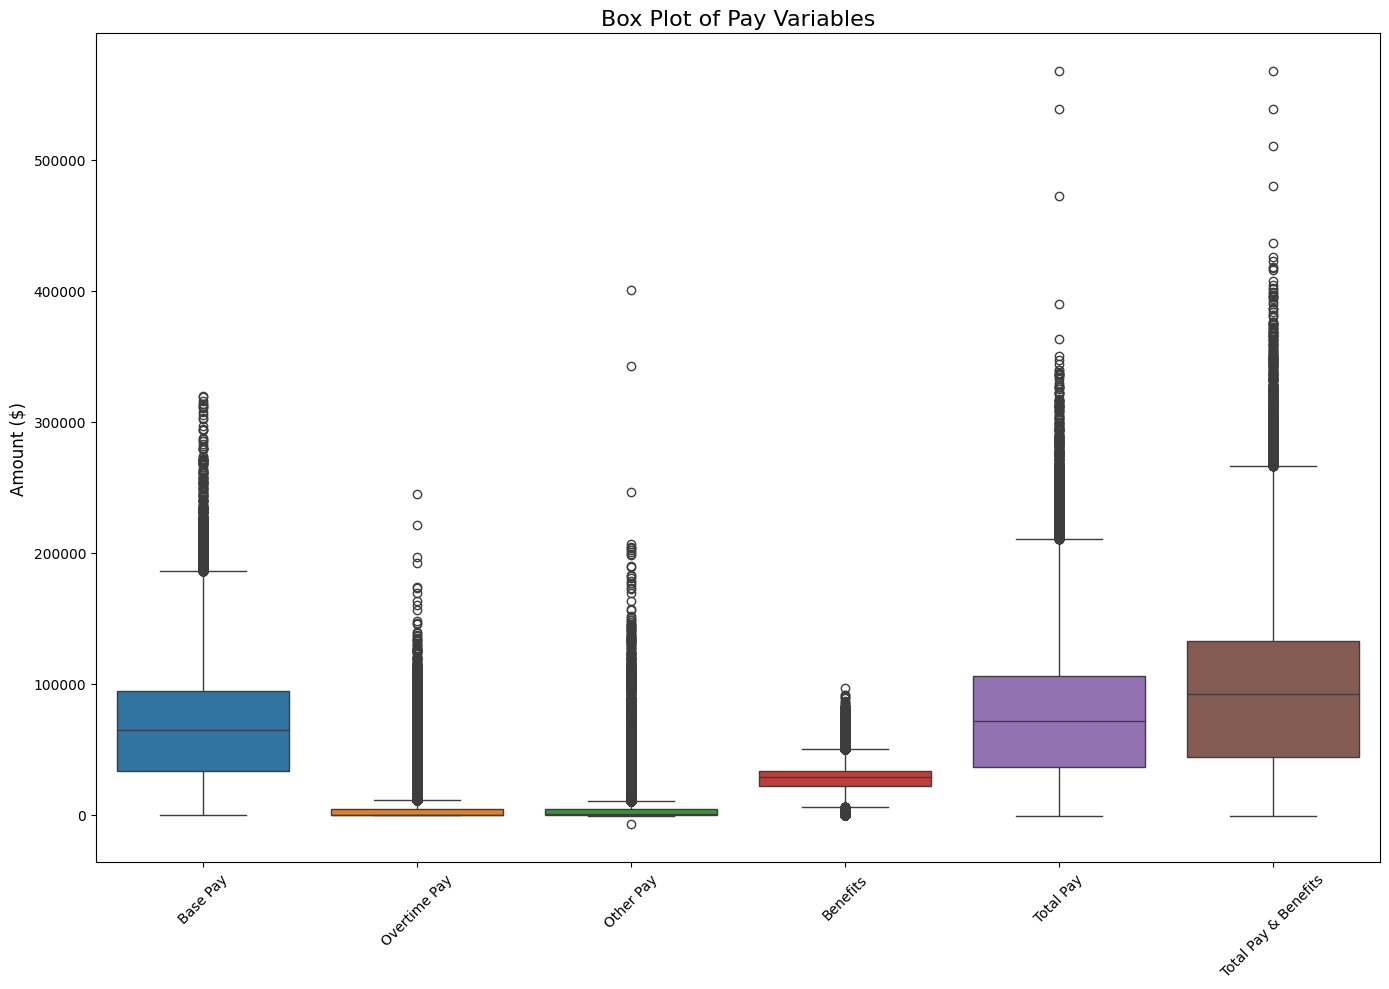

In [170]:
# Create box plots for pay-related columns to visualize outliers
plt.figure(figsize=(14, 10))
sns.boxplot(data=df[pay_columns])
plt.title('Box Plot of Pay Variables', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Amount ($)', fontsize=12)
plt.tight_layout()
plt.show()

We can see that there are a lot of outliers, substitute outliers with median

In [132]:
# Replace outliers with the median
for col in pay_columns:
    # Calculate Q1, Q3 and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create boolean mask for outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

    # Count original outliers
    original_outlier_count = outliers.sum()
    print(f"Original outliers in column {col}: {original_outlier_count}")

    # Get median value
    median_value = df[col].median()

    # Replace outliers with median
    df.loc[outliers, col] = median_value

    # Check for remaining outliers
    remaining_outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    remaining_count = remaining_outliers.sum()

    print(f"Remaining outliers in column {col}: {remaining_count}\n")

Original outliers in column Base Pay: 102 (0.07%)
Remaining outliers in column Base Pay: 0

Original outliers in column Overtime Pay: 25756 (17.33%)
Remaining outliers in column Overtime Pay: 0

Original outliers in column Other Pay: 16006 (10.77%)
Remaining outliers in column Other Pay: 0

Original outliers in column Benefits: 28399 (19.10%)
Remaining outliers in column Benefits: 0

Original outliers in column Total Pay: 246 (0.17%)
Remaining outliers in column Total Pay: 0

Original outliers in column Total Pay & Benefits: 129 (0.09%)
Remaining outliers in column Total Pay & Benefits: 0



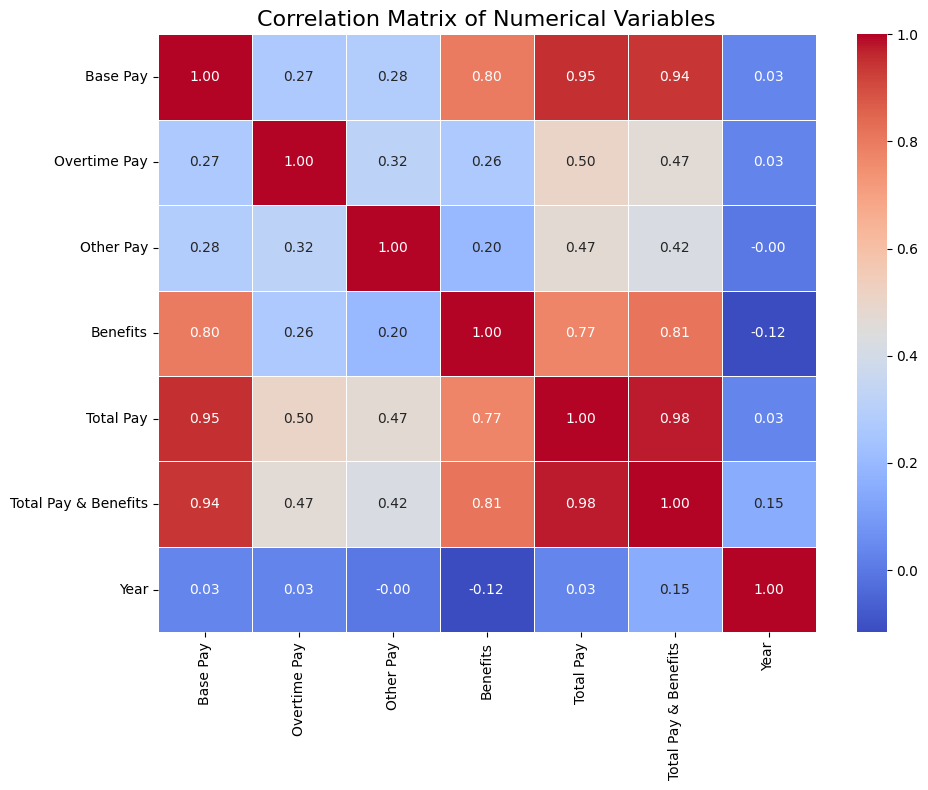

In [172]:
# Calculate correlation matrix
corr_matrix = df[numeric_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

Total unique job titles: 2159

Top 10 most common job titles:
Job Title
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Name: count, dtype: int64


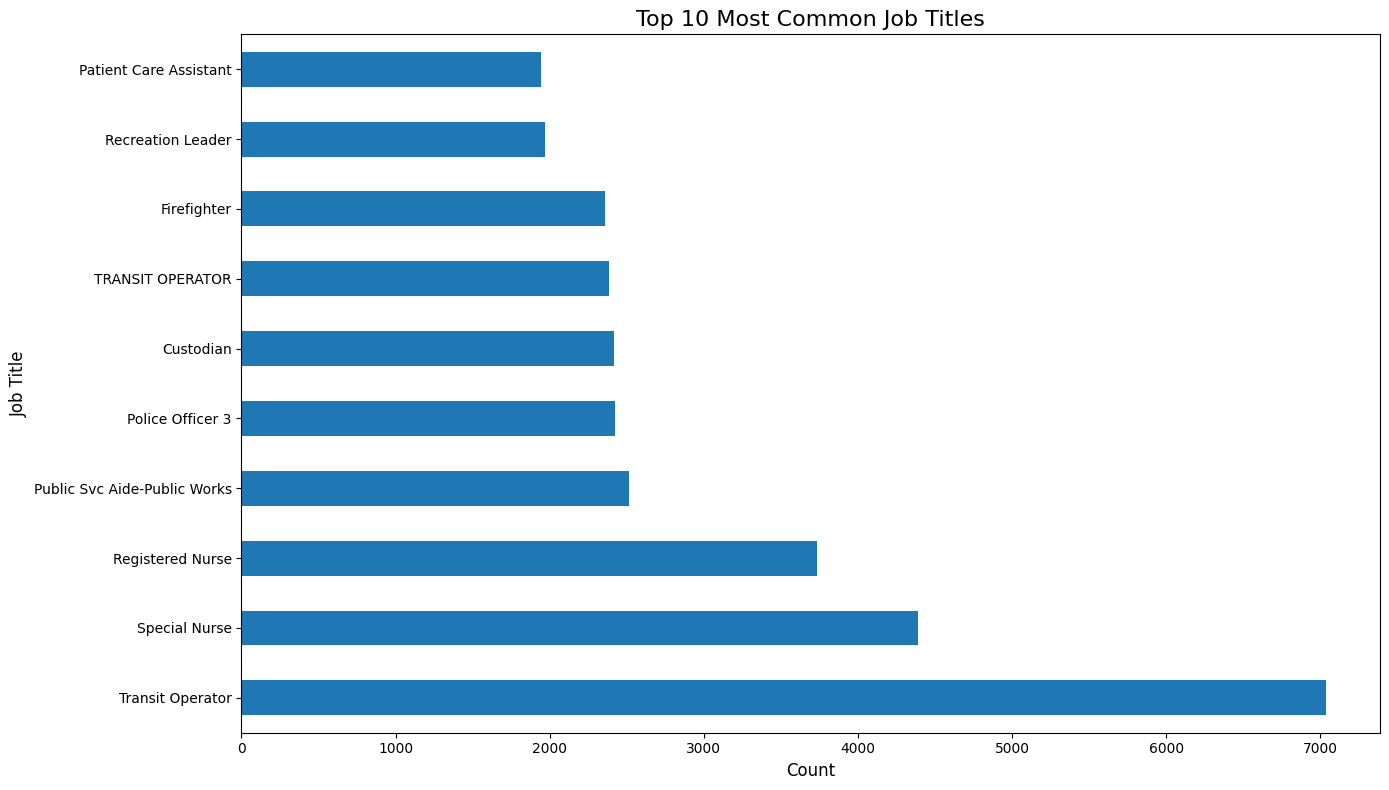

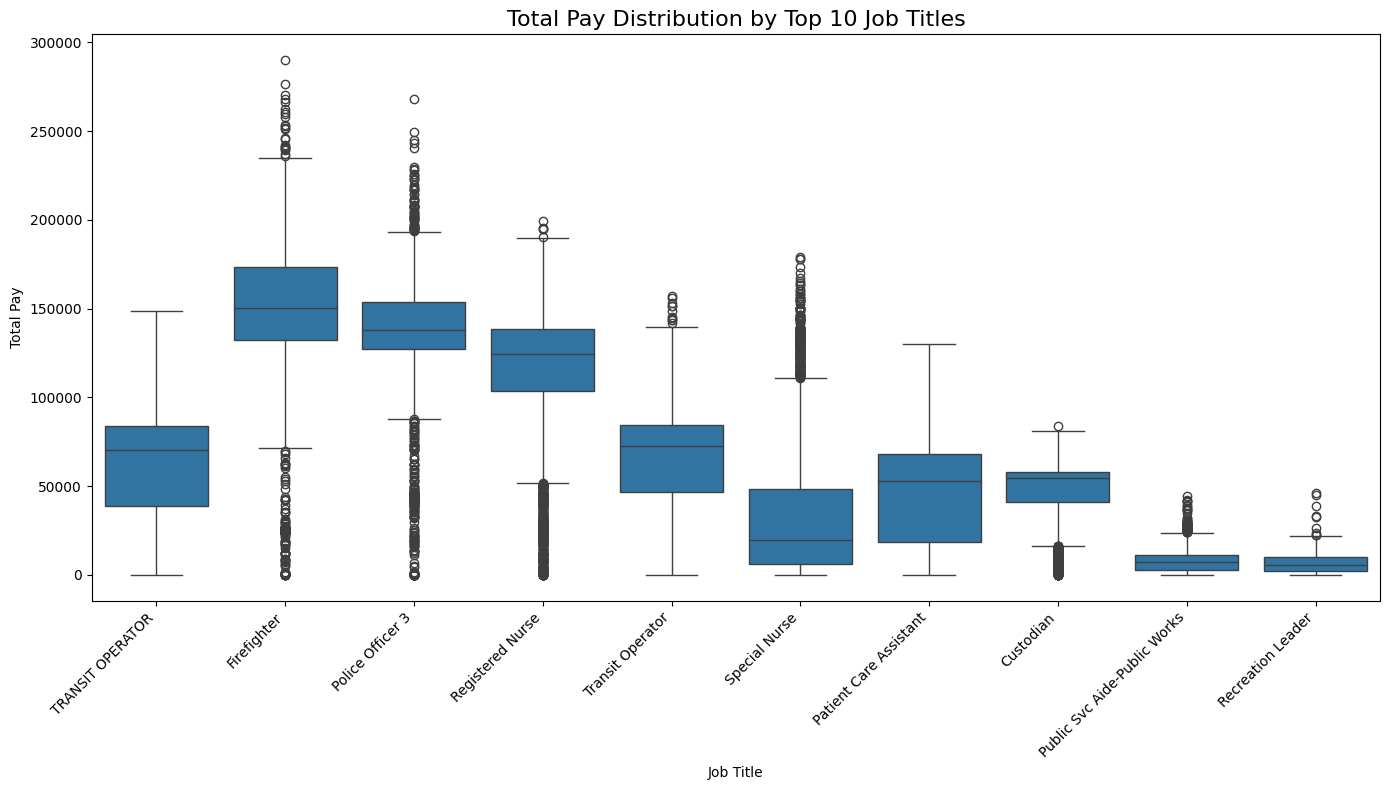

In [173]:
# Check if Job Title exists in the dataset
if 'Job Title' in df.columns:
    # Count the frequency of job titles
    job_counts = df['Job Title'].value_counts()
    print(f"Total unique job titles: {len(job_counts)}")
    print("\nTop 10 most common job titles:")
    print(job_counts.head(10))

    # Plot the top 10 job titles
    plt.figure(figsize=(14, 8))
    job_counts.head(10).plot(kind='barh')
    plt.title('Top 10 Most Common Job Titles', fontsize=16)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Job Title', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Analyze pay by job title (top 10 jobs)
    top_jobs = job_counts.head(10).index
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Job Title', y='Total Pay', data=df[df['Job Title'].isin(top_jobs)])
    plt.title('Total Pay Distribution by Top 10 Job Titles', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

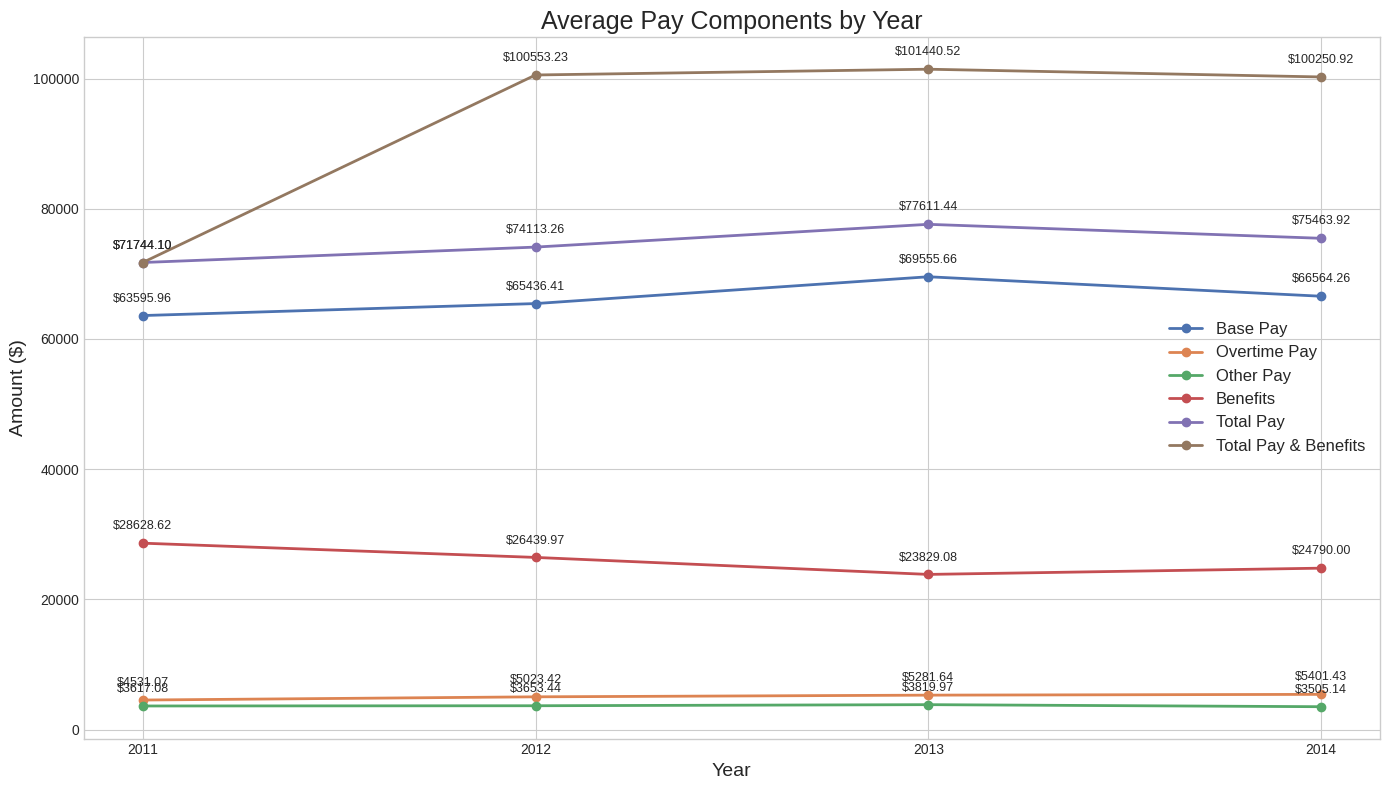

In [177]:
plt.figure(figsize=(14, 8))

# Calculate average pay metrics by year
pay_columns = [col for col in df.columns if 'Pay' in col or 'Benefits' in col]
yearly_averages = df.groupby('Year')[pay_columns].mean().reset_index()

# Create a multi-line plot
for column in pay_columns:
    plt.plot(yearly_averages['Year'], yearly_averages[column], marker='o', linewidth=2, label=column)

plt.title('Average Pay Components by Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount ($)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.xticks(yearly_averages['Year'].unique())  # Ensure all years are shown
plt.tight_layout()

# Add value labels to each point
for column in pay_columns:
    for i, year in enumerate(yearly_averages['Year']):
        value = yearly_averages.loc[yearly_averages['Year'] == year, column].values[0]
        plt.annotate(f"${value:.2f}",
                    (year, value),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center',
                    fontsize=9)

plt.show()

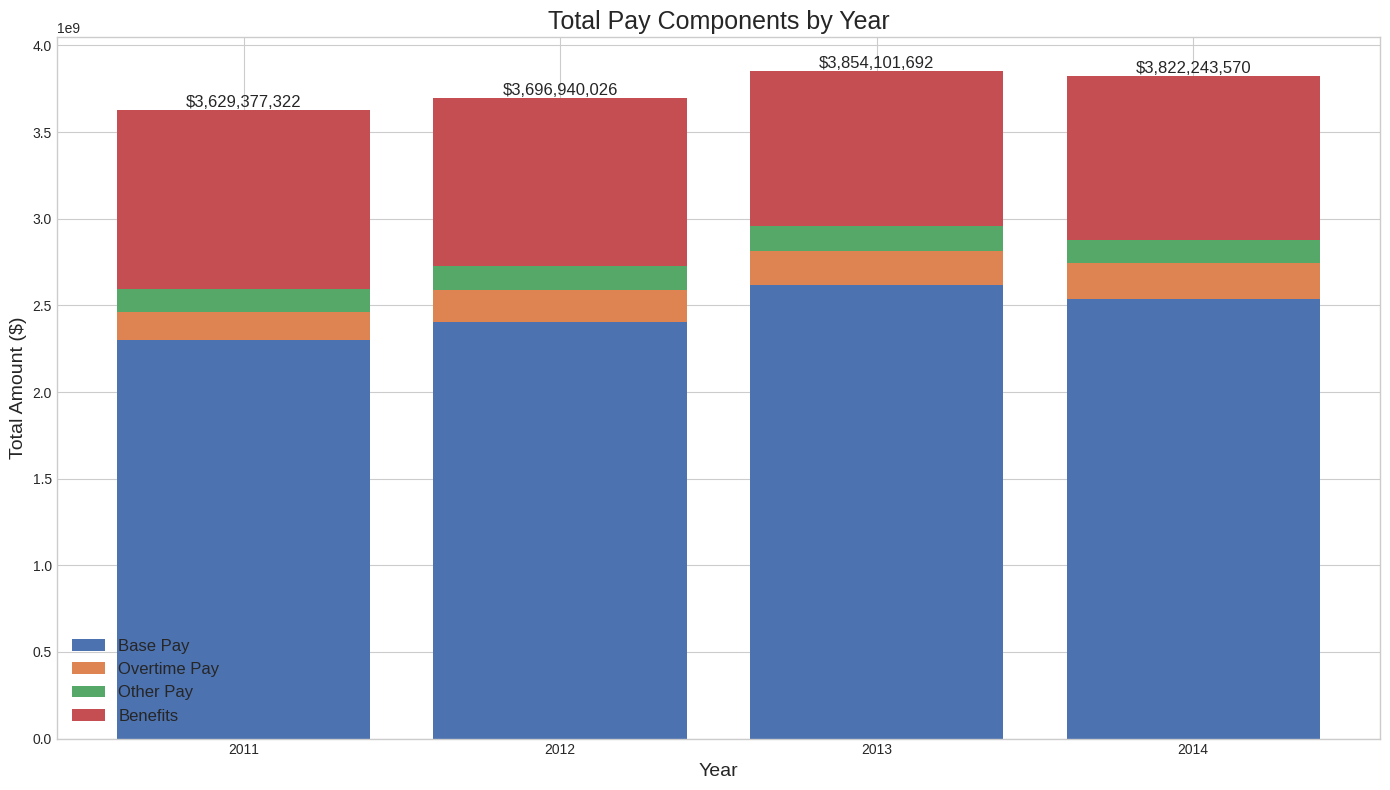

In [184]:
plt.figure(figsize=(14, 8))

pay_components = ['Base Pay', 'Overtime Pay', 'Other Pay', 'Benefits']

# Calculate sum of each pay component by year
yearly_sums = df.groupby('Year')[pay_components].sum().reset_index()

# Create the stacked bar chart
bottom = np.zeros(len(yearly_sums))

for component in pay_components:
    plt.bar(yearly_sums['Year'], yearly_sums[component], bottom=bottom, label=component)
    bottom += yearly_sums[component]

plt.title('Total Pay Components by Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Amount ($)', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(yearly_sums['Year'].unique())  # Ensure all years are shown

# Add total labels on top of each bar
for i, year in enumerate(yearly_sums['Year']):
    total = sum(yearly_sums.loc[yearly_sums['Year'] == year, pay_components].values[0])
    plt.text(year, total, f'${total:,.0f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [182]:
# Calculate percentage breakdown of pay components by year
yearly_percentages = yearly_sums.copy()
for component in pay_components:
    yearly_percentages[component + ' %'] = yearly_sums[component] / yearly_sums[pay_components].sum(axis=1) * 100

print("Percentage Breakdown of Pay Components:")
percentage_cols = ['Year'] + [component + ' %' for component in pay_components]
print(yearly_percentages[percentage_cols].to_string(index=False, float_format=lambda x: f"{x:.2f}%"))

Percentage Breakdown of Pay Components:
 Year  Base Pay %  Overtime Pay %  Other Pay %  Benefits %
 2011      63.36%           4.51%        3.60%      28.52%
 2012      65.08%           5.00%        3.63%      26.29%
 2013      67.87%           5.15%        3.73%      23.25%
 2014      66.39%           5.39%        3.50%      24.73%


In [69]:
# Since the goal is clustering, let's analyze the distribution of potential features
print("Potential features for clustering:")
for col in pay_columns:
    print(f"\n{col}:")
    print(f"* Range: {df[col].min()} to {df[col].max()}")
    print(f"* Standard deviation: {df[col].std()}")
    print(f"* Coefficient of variation: {df[col].std() / df[col].mean():.2f}")

Potential features for clustering:

Base Pay:
* Range: -166.01 to 319275.01
* Standard deviation: 42677.02978091978
* Coefficient of variation: 0.64

Overtime Pay:
* Range: -0.01 to 245131.88
* Standard deviation: 11454.25659392162
* Coefficient of variation: 2.26

Other Pay:
* Range: -7058.59 to 400184.25
* Standard deviation: 8056.506915372539
* Coefficient of variation: 2.21

Benefits:
* Range: -33.89 to 96570.66
* Standard deviation: 13488.172930194592
* Coefficient of variation: 0.52

Total Pay:
* Range: -618.13 to 567595.43
* Standard deviation: 50517.005273949944
* Coefficient of variation: 0.68

Total Pay & Benefits:
* Range: -618.13 to 567595.43
* Standard deviation: 62793.53348323814
* Coefficient of variation: 0.67



Creating scatter plot matrix to visualize potential clusters...


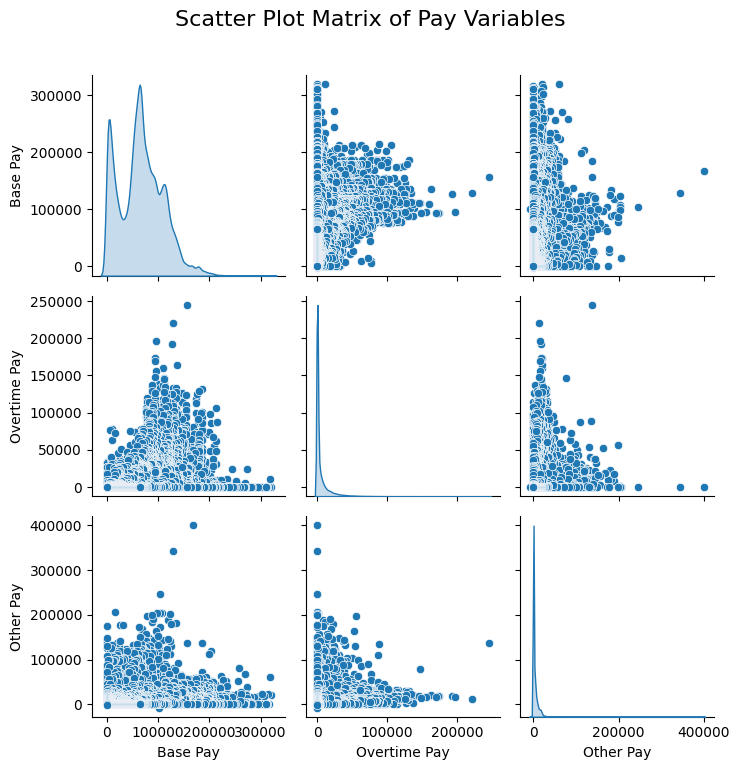

In [70]:
# Scatter plot matrix to visualize potential clusters
print("\nCreating scatter plot matrix to visualize potential clusters...")
# Select a subset of pay columns for the scatter matrix to avoid overcrowding
scatter_columns = pay_columns[:3]  # Limit to 3 columns for clarity
sns.pairplot(df[scatter_columns], diag_kind='kde', height=2.5)
plt.suptitle('Scatter Plot Matrix of Pay Variables', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Clustering

In [ ]:
#Use at least two different clustering algorithms and compare them against one another.
#Testing to see which cluster algorithm is best for the
'''
Firstly, cluster for the jobs based on their various attributes, make it as categories of jobs based on salaries and benefits.
Then eventually, cluster for employeees as well based on their job conditions.
'''

#K-means clustering:
'''
blobs = datasets.make_blobs(n_samples=600, centers=4,
                            cluster_std=0.60, random_state=seed)
moons = datasets.make_moons(600, noise=.05, random_state=seed)

fig, ax = plt.subplots(1, 2, figsize=(8, 3.5), dpi=150)
ax[0].scatter(blobs[0][:, 0], blobs[0][:, 1], edgecolor='none', facecolor='red', s=35, alpha=.5)
ax[0].axis('equal')
ax[1].scatter(moons[0][:, 0], moons[0][:, 1], edgecolor='none', facecolor='red', s=35, alpha=.5)
ax[1].axis('equal')
'''

#Hierarchical Clustering:
#Agglomerative (bottom up):
#They are divided into agglomerative and divisive algorithms
